# AB-тестирование
## Задание AB.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---


**Баллы за задание:**

* Задача 1 — 50 баллов
* Задача 2 — 130 баллов
* Задача 3 — 30 баллов
* Задача 4 — 50 баллов
* Задача 5 — 50 баллов

In [1]:
# Bot check

# HW_ID: ds_ab3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [2]:
import numpy as np
import scipy.stats as sps
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import warnings

from statsmodels.stats.proportion import proportion_confint

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

from catboost import CatBoostRegressor
from statsmodels.formula.api import ols

sns.set(palette='Set2', style='whitegrid', font_scale=1.2)

pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

---
### Задача 1.

Со слов менеджера по развитию интернет-магазина:

> Коллеги, приветики! В прошлом месяце мы проводили эксперимент, в корзине покупателей поставили большую мигающую кнопку "Оплатить" ярко-зеленого цвета. Предполагаем, что покупатель будет быстрее переходить к оплате, не удаляя из корзины лишние товары. Ожидаем прирост выручки на 8-10%. Помогите, пожалуйста, по-скорее оценить эффект, очень горят сроки, скоро выплаты премий, надо успеть раскатить. В <a href="https://disk.yandex.ru/i/L64ohe5i6oz58A">файлике</a> инфа по клиентам, пилотные клиенты отмечены в столбце `b_group`. Спасибо огромное!

Помогите коллегам с их запросом.

In [25]:
data = pd.read_excel("hw_ab3_task1.xlsx", index_col=0)
data

,gender,OS,month1,month2,month3,month4,month5,month6,month7,month8,...,month10,month11,month12,month13,month14,month15,month16,month17,month18,b_group
0,woman,Android,0.000000,0.000000,1260.801227,1245.777408,0.000000,0.000000,1381.093860,1237.133907,...,1110.443064,0.000000,0.000000,0.000000,0.000000,1362.797130,1555.238727,0.000000,0.000000,no
1,man,Android,2142.521523,1821.295907,1832.895312,1646.448173,0.000000,2154.948644,1912.998501,1795.471291,...,0.000000,2253.871388,2526.126916,2861.138746,3068.924457,3384.232538,0.000000,0.000000,0.000000,yes
2,man,iOS,2064.105816,0.000000,0.000000,1454.148004,1821.118092,1917.801237,2188.827425,0.000000,...,1605.922754,0.000000,0.000000,1672.408077,1403.642040,1094.256738,962.442222,0.000000,1483.007220,no
3,woman,Android,1177.158341,1311.983158,0.000000,1302.464341,0.000000,0.000000,1479.573874,1356.655637,...,1713.852207,0.000000,0.000000,0.000000,1025.802676,1020.161834,949.921959,1029.725858,866.403692,yes
4,man,iOS,0.000000,2603.825002,2350.628045,2061.660828,1686.922097,0.000000,2720.638298,2541.299625,...,1920.793567,1879.833618,1991.184786,0.000000,2792.189328,2498.976500,2121.921368,2130.713432,2035.514926,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,woman,Android,1622.552434,1683.134762,2118.094350,0.000000,1817.991204,1590.660985,0.000000,0.000000,...,1197.154056,825.592448,0.000000,1662.931490,1152.980582,1207.615671,1152.368959,0.000000,0.000000,no
29996,man,Android,0.000000,0.000000,0.000000,0.000000,1953.336419,2026.286020,2612.472036,2125.050475,...,0.000000,0.000000,0.000000,2009.851528,1490.434456,1406.832270,0.000000,0.000000,1960.414356,no
29997,woman,Android,1968.694972,2009.887445,0.000000,2388.803481,1908.560517,1720.173371,0.000000,0.000000,...,1513.379997,1254.574216,1010.614767,0.000000,1913.572777,1848.412821,1926.907527,1974.530773,0.000000,no
29998,woman,Android,0.000000,0.000000,2159.235704,1764.508813,1727.960628,1581.830958,1483.317190,0.000000,...,0.000000,0.000000,2094.332095,0.000000,0.000000,0.000000,2288.905578,2294.409658,0.000000,no


Посмотрим на метрики по каждому месяцу для каждой из групп

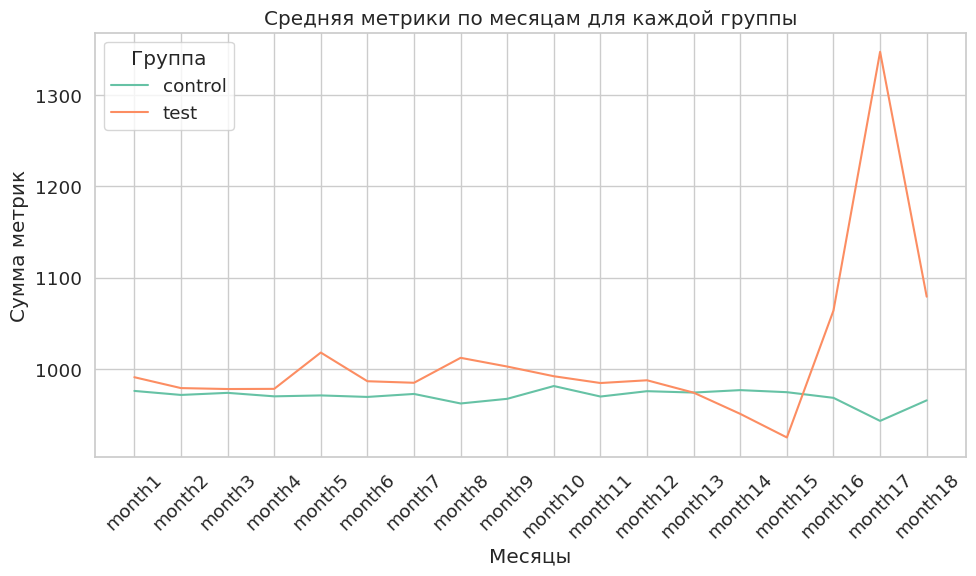

In [9]:
months = [f"month{i}" for i in range(1, 19)]

data_grouped = data.groupby('b_group')[months].mean()

plt.figure(figsize=(10, 6))

for group in data_grouped.index:
    plt.plot(months, data_grouped.loc[group],
             label=('test' if group == 'yes' else 'control'))

plt.title('Средняя метрики по месяцам для каждой группы')
plt.xlabel('Месяцы')
plt.ylabel('Сумма метрик')
plt.xticks(rotation=45)
plt.legend(title="Группа")

plt.tight_layout()
plt.show()

Видно, что есть различия по месяцам. Посмотрим на разницу по категориальным признакам

In [63]:
grouped = data.groupby(['OS', 'gender', 'b_group']).size().unstack(fill_value=0)

grouped

b_group            no   yes
OS      gender             
Android man     10462  1156
        woman    9214  1041
iOS     man      3898   424
        woman    3426   379

Видно, что явных перекосов между стратами не видно.

Итого. Если мы будем считать, что эксп проводится весь 18-й месяц, а 17-й ему предшествует, то видно, что отбор пользователей в тест неслучаен. Как минимум, эти пользователи активны в предыдущий месяц. Так просто проводить АБ по всем данным некорретно

Мы не знаем какой дизайн у экспа. Лучше всего спросить у заказчика что именно происходило, а еще лучше целиком его перезапускать.

Если предположить, что отбор происходит по факту активности в предыдущий месяц, то единственные выводы, которые мы можем делать по экспу - это то, как меняется поведение таких пользователей. Даже если у них выручка выросла, следует проверить, как меняется выручка для менее активных пользователей (вдруг таких пользователей сильно больше, а выручка для них падает). То есть может даже принимать решения по этому экспу (катим или нет) не следует. 

Оценить на активных пользователях эксп можно так. Для каждого пользователя из теста подберем похожего пользователя из контроля - тех же страт и наиболее близкой метрике (берем гарантированно разных пользователей)

Затем оцениваем эффект на этой паре выборок

In [43]:
group_yes = data[data['b_group'] == 'yes']
group_no = data[data['b_group'] == 'no']

used_indices_no = []
new_rows = []

data_new = group_yes.copy()

for idx, row_yes in tqdm(group_yes.iterrows()):
    metric_17_yes = row_yes['month17']
    gender, OS = row_yes['gender'], row_yes['OS'], 
    
    differences = (group_no['month17'] - metric_17_yes).abs()
    
    available_rows = group_no.loc[
        ~group_no.index.isin(used_indices_no) & 
        (group_no['gender'] == gender) & 
        (group_no['OS'] == OS)
    ]


    closest_row_idx = available_rows.iloc[differences.loc[available_rows.index].argmin()].name
    
    row_no = group_no.loc[closest_row_idx]
    data_new = pd.concat([data_new, row_no.to_frame().T], ignore_index=True)
    
    used_indices_no.append(closest_row_idx)

0it [00:00, ?it/s]

Теперь выручка по месяцам перед экспом не так сильно различаются. Тем не менее, есть разница в более разных месяцах. Это уже подозрительно. Возможно отбор в тест проходит по еще каким-то признакам. Такая оценка эффекта может оказаться невалидной. Можно, например, провести на исторических данных валидацию такой оценки.

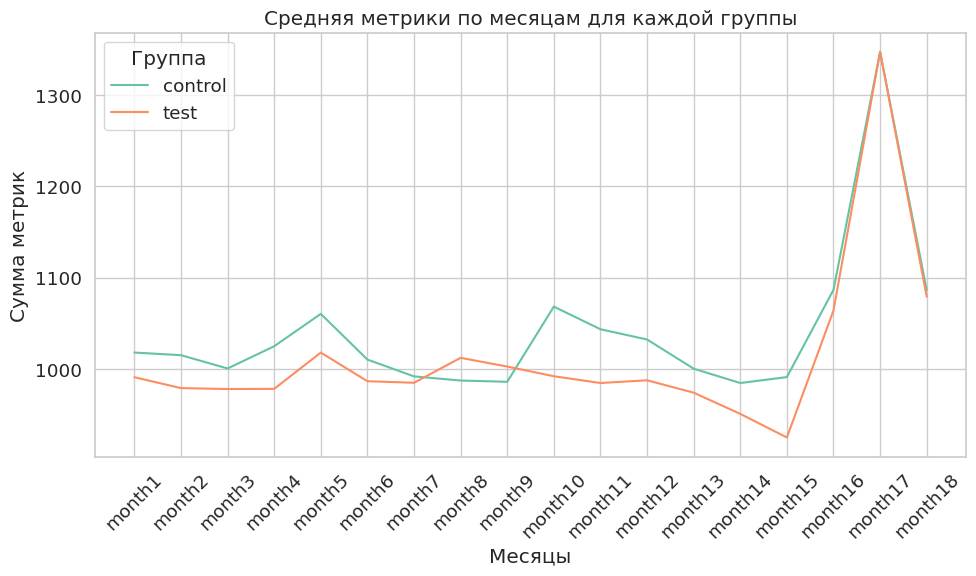

In [45]:
months = [f"month{i}" for i in range(1, 19)]

data_grouped = data_new.groupby('b_group')[months].mean()

plt.figure(figsize=(10, 6))

for group in data_grouped.index:
    plt.plot(months, data_grouped.loc[group],
             label=('test' if group == 'yes' else 'control'))

plt.title('Средняя метрики по месяцам для каждой группы')
plt.xlabel('Месяцы')
plt.ylabel('Сумма метрик')
plt.xticks(rotation=45)
plt.legend(title="Группа")

plt.tight_layout()
plt.show()

Тем не менее, проведем т-тест

In [46]:
group_yes = data_new[data_new['b_group'] == 'yes']
group_no = data_new[data_new['b_group'] == 'no']

group_yes_month18 = pd.to_numeric(group_yes['month18'])
group_no_month18 = pd.to_numeric(group_no['month18'])

t_stat, p_value = sps.ttest_ind(group_yes_month18,
                                group_no_month18,
                                equal_var=False)

print(f"T-статистика: {t_stat:.3f}")
print(f"P-значение: {p_value:.3f}")

if p_value < 0.05:
    print("Есть статистически значимые различия между группами.")
else:
    print("Статистически значимых различий нет.")

T-статистика: -0.240
P-значение: 0.810
Статистически значимых различий нет.


Итого, с такой аппроксимацией тестовой выборки мы не видим статистических различий. Похоже, эксп не ломает активных пользователей и их поведение существенно не меняется. Однако мы не знаем как он ведет себя с неактивными пользователями. Может оказаться так, что выручка на них сильно растет и это ожидается со стороны заказчика, тогда эксп можно и катить.

Принимать какие-то решения по этим данным не зная дизайн не следует.

Как минимум, еще стоит провалидировать такой метод оценки, но это может оказаться трудозатраным решением для такой задачи. Скорее всего следует перепровести эксп.

---
### Задача 2.

Вам <a href="https://disk.yandex.ru/d/d9uxKFsst-YBkA">выдана</a> часть информации о визитах пользователей на сайте Физтех.Статистики начиная с 2020 года по данным Яндекс.Метрики. Визит &mdash; последовательность действий пользователя на сайте, которая начинается на некоторой странице сайта, содержит в себе переходы по ссылкам (и другие действия), и заканчивается на какой-то, возможно, другой страницей сайта. Визит считается завершенным, если активность отсутствует в течение некоторого времени, обычно &mdash; 30 минут.

Описание полей доступно по <a href="https://yandex.ru/dev/metrika/doc/api2/logs/fields/visits.html">ссылке</a>.

Ознакомьтесь с данными, ответив на следующие вопросы.
1. Сколько всего визитов представлено в данных?
2. Когда совершены первый и последний визиты?
3. Постройте динамику количества визитов во времени по дням.
4. Сколько уникальных пользователей в данных?
5. Сколько в среднем один пользователь совершил визитов? Сколько максимально?
6. Постройте гистограмму глубины и продолжительности визитов.
7. Из каких стран больше пользователей?
8. Какие браузеры и операционные системы в топе?

Считаем данные

In [69]:
data = pd.read_csv("miptstats_metrica.tsv", sep="\t")
data.columns = data.columns.str.replace(r'^ym:s:', '', regex=True)
data["dateTimeUTC"] = pd.to_datetime(data["dateTimeUTC"])
data

,visitID,clientID,dateTimeUTC,startURL,endURL,pageViews,visitDuration,isNewUser,bounce,regionCountry,...,browserCountry,mobilePhone,operatingSystemRoot,browser,browserEngine,screenOrientation,screenWidth,screenHeight,windowClientWidth,windowClientHeight
0,1.801686e+19,1568056026568729022,2020-01-01 03:28:50,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,1,0,1,Russia,...,gb,NaN,gnu_linux,chrome,WebKit,2,1920,1080,1905,981
1,1.802359e+19,1577864187752491163,2020-01-01 10:36:27,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,9,215,1,0,Singapore,...,us,apple,ios_double,safari_mobile,WebKit,1,375,667,375,559
2,1.802460e+19,1567765219104836417,2020-01-01 11:40:44,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,88,0,0,Russia,...,ru,apple,ios_double,yandex_browser,WebKit,1,414,736,414,660
3,1.802475e+19,1576839432510419026,2020-01-01 11:50:13,https://mipt-stats.gitlab.io/jekyll/update/201...,https://mipt-stats.gitlab.io/jekyll/update/201...,1,19,0,0,China,...,ru,samsung,android,chromemobile,WebKit,1,412,892,412,756
4,1.802518e+19,1576246599115183097,2020-01-01 12:17:33,https://mipt-stats.gitlab.io/,https://mipt-stats.gitlab.io/jekyll/update/201...,2,2,0,0,Russia,...,ru,NaN,gnu_linux,firefox,Gecko,2,1920,1080,913,942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387348,8.349148e+17,170889374781031580,2024-02-25 23:42:27,https://miptstats.github.io/,https://miptstats.github.io/,1,15,1,0,Russia,...,ru,samsung,android,chromemobile,WebKit,1,384,832,384,756
387349,8.349555e+17,1706366044539443064,2024-02-25 23:45:02,https://miptstats.github.io/courses/python/09_...,https://miptstats.github.io/courses/python/09_...,1,0,0,1,Russia,...,ru,NaN,windows,chrome,WebKit,2,1600,900,1583,771
387350,8.350287e+17,1707574597556843446,2024-02-25 23:49:41,https://miptstats.github.io/courses/ad_fivt/ta...,https://miptstats.github.io/courses/ad_fivt/ta...,1,0,0,1,Russia,...,ru,NaN,windows,chrome,WebKit,2,1536,864,1519,729
387351,8.350809e+17,17088943799001288,2024-02-25 23:52:59,https://mipt-stats.gitlab.io/courses/python/05...,https://mipt-stats.gitlab.io/courses/python/05...,1,23,1,0,Russia,...,ru,realme,android,yandexsearch,WebKit,1,393,851,393,687


Информация о датасете

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387353 entries, 0 to 387352
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   visitID              387353 non-null  float64       
 1   clientID             387353 non-null  uint64        
 2   dateTimeUTC          387353 non-null  datetime64[ns]
 3   startURL             387338 non-null  object        
 4   endURL               387338 non-null  object        
 5   pageViews            387353 non-null  int64         
 6   visitDuration        387353 non-null  int64         
 7   isNewUser            387353 non-null  int64         
 8   bounce               387353 non-null  int64         
 9   regionCountry        382478 non-null  object        
 10  regionCity           326661 non-null  object        
 11  networkType          43035 non-null   object        
 12  browserLanguage      327934 non-null  object        
 13  browserCountry

Ответы на часть вопросов

In [80]:
print("Сколько всего визитов представлено в данных?")
print(len(data))
print("Когда совершены первый и последний визиты?")
print("Первый:", data["dateTimeUTC"].min())
print("Последний:", data["dateTimeUTC"].max())

print("Сколько уникальных пользователей в данных?")
print(data["clientID"].nunique())
print("Сколько в среднем один пользователь совершил визитов? Сколько максимально?")
print(f"Среднее: {data.groupby(by="clientID")['visitID'].count().mean():.2f}")
print(f"Максимум: {data.groupby(by="clientID")['visitID'].count().max()}")

Сколько всего визитов представлено в данных?
387353
Когда совершены первый и последний визиты?
Первый: 2020-01-01 03:28:50
Последний: 2024-02-25 23:58:46
Сколько уникальных пользователей в данных?
162474
Сколько в среднем один пользователь совершил визитов? Сколько максимально?
Среднее: 2.38
Максимум: 58700


Постройте динамику количества визитов во времени по дням

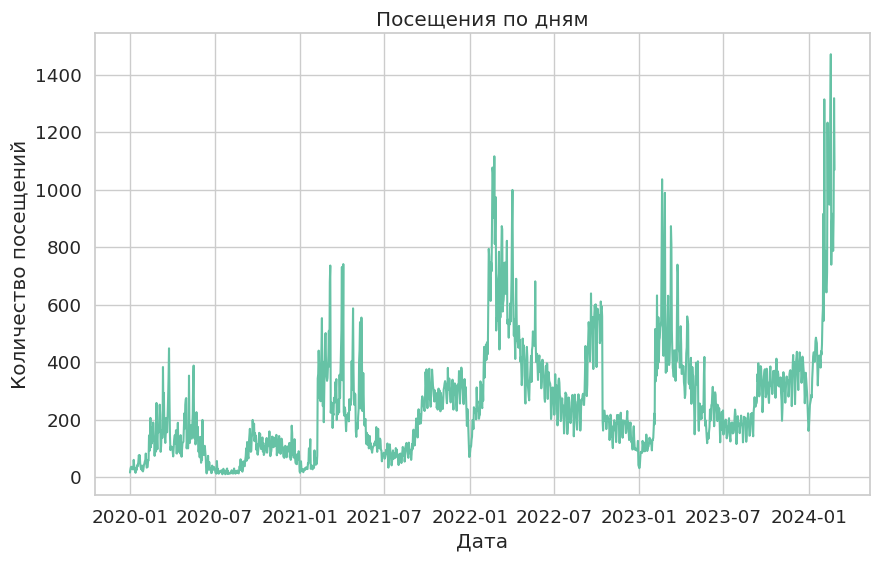

In [97]:
data_grouped = data.groupby(data["dateTimeUTC"].dt.date)['visitID'].count()

plt.figure(figsize=(10, 6))
plt.plot(data_grouped.index, data_grouped.values)
plt.xlabel("Дата")
plt.ylabel("Количество посещений")
plt.title("Посещения по дням")
plt.grid(True)

plt.show()

Постройте гистограмму глубины и продолжительности визитов

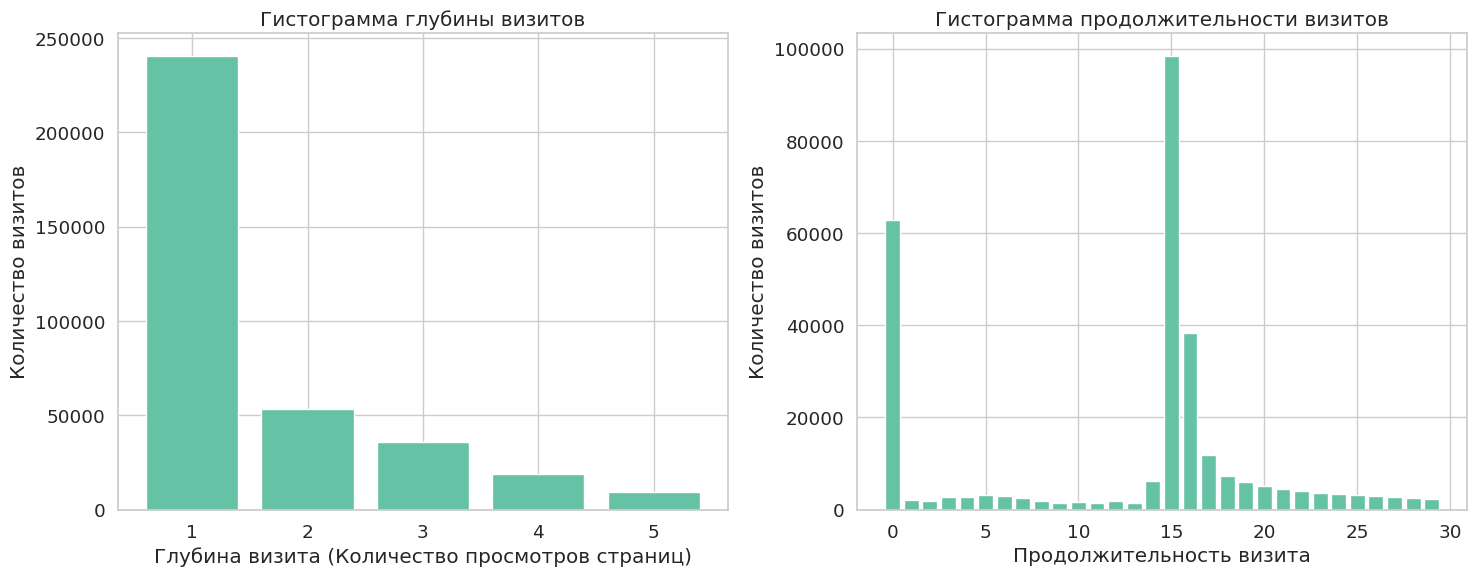

In [119]:
data_grouped_pageviews = data.groupby(data["pageViews"])['visitID'].count()
data_grouped_duration = data.groupby(data["visitDuration"])['visitID'].count()

fig, ax = plt.subplots(1, 2, figsize=(15, 6))

ax[0].bar(data_grouped_pageviews.index[:5], data_grouped_pageviews.values[:5])
ax[0].set_xlabel("Глубина визита (Количество просмотров страниц)")
ax[0].set_ylabel("Количество визитов")
ax[0].set_title("Гистограмма глубины визитов")
ax[0].grid(True)

ax[1].bar(data_grouped_duration.index[:30], data_grouped_duration.values[:30])
ax[1].set_xlabel("Продолжительность визита")
ax[1].set_ylabel("Количество визитов")
ax[1].set_title("Гистограмма продолжительности визитов")
ax[1].grid(True)

plt.tight_layout()
plt.show()

Из каких стран больше пользователей?

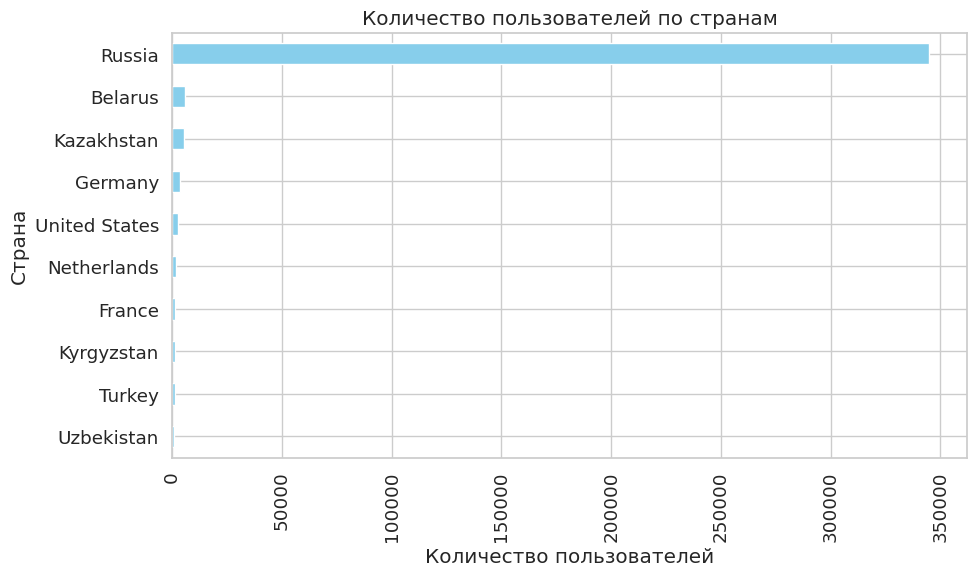

In [132]:
country_counts = data.groupby("regionCountry")['clientID'].count()

country_counts = country_counts.sort_values(ascending=False).head(10)
country_counts = country_counts.sort_values(ascending=True)

plt.figure(figsize=(10, 6))
country_counts.plot(kind='barh', color='skyblue')
plt.title('Количество пользователей по странам')
plt.ylabel('Страна')
plt.xlabel('Количество пользователей')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


Какие браузеры и операционные системы в топе?

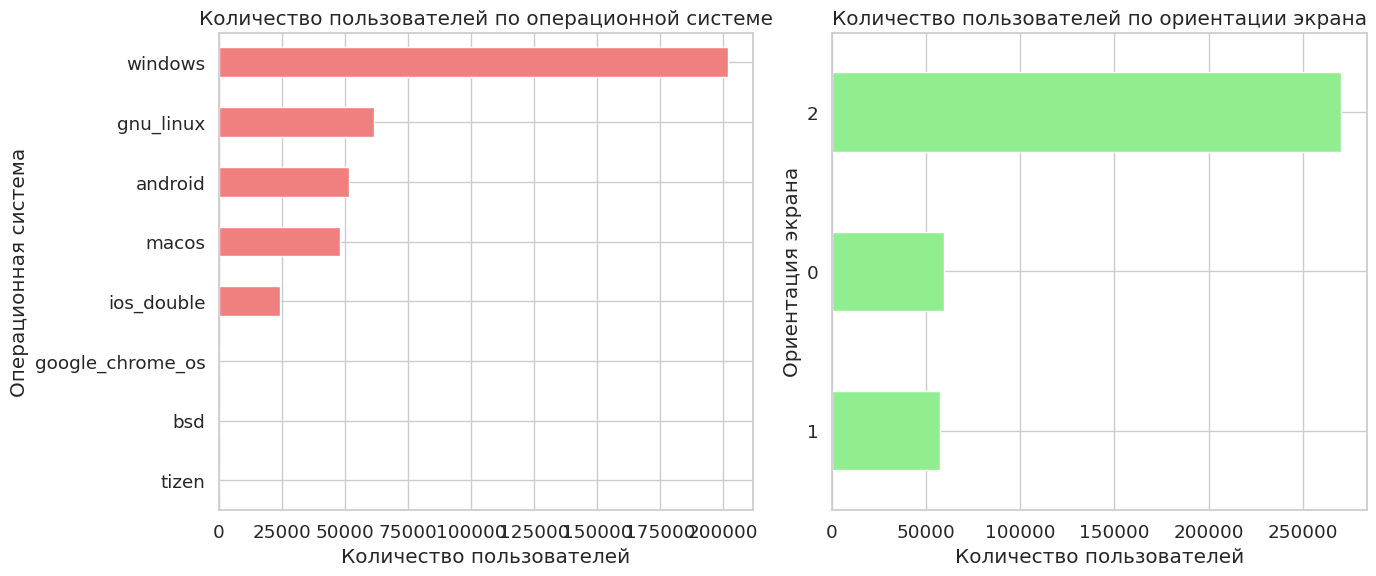

In [134]:
os_counts = data.groupby("operatingSystemRoot")['clientID'].count()
orientation_counts = data.groupby("screenOrientation")['clientID'].count()

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

os_counts.sort_values(ascending=True).plot(kind='barh',
                                            color='lightcoral', ax=axes[0])
axes[0].set_title('Количество пользователей по операционной системе')
axes[0].set_xlabel('Количество пользователей')
axes[0].set_ylabel('Операционная система')

orientation_counts.sort_values(ascending=True).plot(kind='barh',
                                                     color='lightgreen',
                                                     ax=axes[1])
axes[1].set_title('Количество пользователей по ориентации экрана')
axes[1].set_xlabel('Количество пользователей')
axes[1].set_ylabel('Ориентация экрана')

plt.tight_layout()
plt.show()

В апреле команда Физтех.Статистики планирует провести эксперимент продолжительностью 4 недели, покрасив фон всех страниц в розовый цвет, а также добавив к нему анимированных котиков и сердечек. *Гипотеза &mdash; средняя по посетителям глубина просмотра страниц вырастет на 5%.* Вам, как студентам DS-потока, предстоит задизайнить этот эксперимент. 

Выберите размеры групп на основе некоторых соображений.

Число пользователей сайта увеличивается и обладает годовой сезонность. Надо посмотреть сколько пользователей есть в апреле прошлых лет и посмотреть на динамику, обозначим на графике апрели и феврали

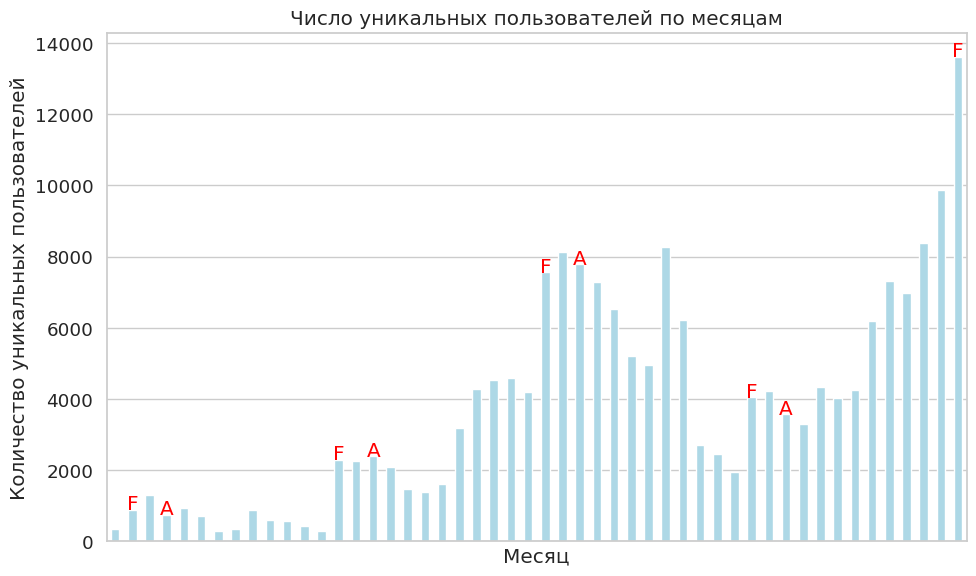

In [147]:
monthly_unique_users = data.groupby(data['dateTimeUTC'].dt.to_period('M'))['clientID'].nunique()

plt.figure(figsize=(10, 6))
monthly_unique_users.plot(kind='bar', color='lightblue')

plt.xlabel("Месяц")
plt.ylabel("Количество уникальных пользователей")
plt.title("Число уникальных пользователей по месяцам")
plt.xticks([])

for i, period in enumerate(monthly_unique_users.index):
    if period.month == 2:
        plt.text(i, monthly_unique_users[i] + 3, 'F', ha='center', color='red')
    if period.month == 4:
        plt.text(i, monthly_unique_users[i] + 5, 'A', ha='center', color='red')

plt.tight_layout()
plt.show()

Можем предположить, что у нас будет ~12000 пользователей в следующем апреле. Отсюда и размеры групп - половину в тест, другую половину в контроль. В качестве оценки снизу можно взять 10000 - размеры групп по 5000.

Для абсолютного и относительного t-test проведите валидацию по историческим данным, семплируя момент времени начала эксперимента и сами группы пользователей. В рамках валидации оцените вероятность ошибки 1 рода и мощность критериев для ожидаемого эффекта.

Следите чтобы используемые интервалы времени не выходили за границы доступных данных. Возможно, на основе проведенного ранее первичного анализа данных стоит ограничить длину исторических данных, по которой будете проводить варидацию.

Распишите подробно поэтапный алгоритм валидации:

Делаем B раз следующее:

1) Семплируем тест и контроль
2) Добавляем эффект к тесту (если эффект=0, получаем АА тест, иначе АБ)
3) Применяем критерии

Считаем частоту отвергания H0. В случае АА это дает оценку ошибки первого рода, а в случае АБ - мощность.

Реализуйте его

Вспомогательные функции

In [281]:
def calculate_strata_weights(data, strata_name, target_name):
    '''
    Вычисляет веса страт.

    
    :param data: исходные данные
    :param strata_name: название страты
    :param target_name: название таргеты
    :param strata_name: название страты
    :return: веса страт
    '''
    
    strata_weights = data.groupby(by=strata_name)[target_name].count()
    strata_weights = strata_weights / strata_weights.sum()
    return strata_weights

def weighted_mean(data, strata_name, target_name, weights):
    '''
    Вычисляет взвешенное среднее.

    :param data: данные
    :param strata_name: название страты
    :param target_name: название таргеты
    :param weights: веса страт
    :return: взвешенное среднее
    '''

    strata_means = data.groupby(by=strata_name)[target_name].mean()
    return (strata_means * weights).sum()

def absolute_ttest(x, y):
    """
    Абсолютный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    """
    res = sps.ttest_ind(x, y)
    stat, pvalue = res.statistic, res.pvalue
    left_bound, right_bound = res.confidence_interval()

    return stat, pvalue, left_bound, right_bound

def relative_ttest(x, y, alpha=0.05):
    """
    Относительный t-test.

    Аргументы:
    x, y -- выборки одинакового размера
    alpha -- уровень значимости

    Возвращает:
    stat -- статистика критерия
    pvalue
    left_bound, right_bound -- границы дов. интервала
    """

    n = len(x)
    x_mean = x.mean()
    y_mean = y.mean()

    stat = x_mean / y_mean - 1
    var = x.var() / (y_mean**2) + y.var() * (x_mean**2) / (y_mean**4)
    std = np.sqrt(var)

    z_stat = np.sqrt(n) * stat / std
    pvalue = 2 * sps.norm.sf(np.abs(z_stat))

    q = sps.norm.ppf(1 - alpha / 2)
    left_bound = stat - q * std / np.sqrt(n)
    right_bound = stat + q * std / np.sqrt(n)

    return stat, pvalue, left_bound, right_bound

def simple_mean(data, strata_name, target_name, weights):
    '''
    Вычисляет обычное выборочное среднее

    :param data: данные
    :param weights: не используется, нужен для совместимости
    :return: выборочное среднее
    '''

    return data[target_name].mean()

def stratified_sampler(data, strata_name, target_name, sample_size):
    '''
    Стратифицированное семплирование выборок.

    :param data: данные
    :param target_name: название таргеты
    :param sample_size: размер выборки
    :return: две выборки
    '''

    # Веса страт
    strata_weights = calculate_strata_weights(data, strata_name, target_name)

    # Размер выборок
    strata_sample_size = np.floor(sample_size * strata_weights + 0.5).astype(int)

    a_group, b_group = [], []
    # Генерируем для каждой страты отдельно
    for i, strata in enumerate(data.groupby(by=strata_name)):
        a, b = random_sampler(strata[1], strata_sample_size[i])
        a_group.append(a)
        b_group.append(b)

    return pd.concat(a_group), pd.concat(b_group)


def weighted_var(data, strata_name, target_name, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при стратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by=strata_name)[target_name].var()
    return (strata_vars * strata_weights).sum() / len(data)


def weighted_post_var(data, strata_name, target_name, strata_weights):
    '''
    Вычисляет взвешенную дисперсию при постстратификации.
    
    :param data: данные
    :param strata_weights: веса страт
    :return: дисперсия
    '''
    
    strata_vars = data.groupby(by=strata_name)[target_name].var()
    weighted_var = (strata_vars * strata_weights).sum() / len(data)
    post_addition = (strata_vars * (1-strata_weights)).sum() / (len(data)**2)
    return weighted_var + post_addition


def simple_var(data, strata_name, target_name, strata_weights):
    '''
    Вычисляет обычную дисперсию при случайном семплировании.

    :param data: данные
    :param strata_weights: веса страт, не используется, нужен для совместимости
    :return: дисперсия
    '''

    return data[target_name].var() / len(data)
    
def stratified_ttest(x_data, y_data, strata_name, target_name,
                     strata_weights, method='random', alpha=0.05):
    '''
    Стратифицированный абсолютный t-test.
    
    :param x_data: выборка вместе с информацией о стратах
    :param y_data: выборка вместе с информацией о стратах
    :param strata_weights: веса страт
    :param method: метод 'random', 'stratified', 'post_stratified'
    :param alpha: уровень значимости
    :return: статистика критерия, границы доверительного интервала, p-value
    '''
    
    if method == 'random':
        mean_function = simple_mean
        var_function = simple_var
    elif method == 'stratified':
        mean_function = weighted_mean
        var_function = weighted_var
    elif method == 'post_stratified':
        mean_function = weighted_mean
        var_function = weighted_post_var
        
    x_mean = mean_function(x_data, strata_name, target_name, strata_weights)
    y_mean = mean_function(y_data, strata_name, target_name, strata_weights)
    x_var  =  var_function(x_data, strata_name, target_name, strata_weights)
    y_var  =  var_function(y_data, strata_name, target_name, strata_weights)
    
    stat = x_mean - y_mean
    std = np.sqrt(x_var + y_var)
    
    t_stat = stat / std
    pvalue = 2*sps.norm.sf(np.abs(t_stat))
    
    q = sps.norm.ppf(1 - alpha/2)
    left_bound = stat - q*std
    right_bound = stat + q*std
    
    return stat, pvalue, left_bound, right_bound

def visualization(prob_reject, left_bound, right_bound,
                  show_pvals=False, pvals=None, alpha=0.05, figsize=(7, 2), title=None):
    '''
    Отрисовка интервала для вероятности отвержения критерия 
    и гистограммы p-value (опционально)
    prob_reject -- оценка вероятности отвержения
    left_bound, right_bound -- границы доверительного интервала
    alpha -- теор вероятность ошибки первого рода
    show_pvals -- показывать ли распределение p-value
    pvals -- массив из p-value
    figsize -- размер фигуры matplotlib
    '''
    
    # построение гистограммы p-value (опционально)
    if show_pvals:
        with sns.axes_style("whitegrid"):
            plt.figure(figsize=figsize)
            plt.subplot(1, 2, 1)
            plt.hist(pvals, bins=np.linspace(0, 1, 21), alpha=0.7,
                    weights=np.ones(len(pvals)) / len(pvals))
            plt.title('Распределение p-value')

    # отрисовка интервала для вероятности отвержения критерия
    with sns.axes_style("whitegrid"):
        if show_pvals:
            plt.subplot(1, 2, 2)
        else:
            plt.figure(figsize=figsize)
        plt.hlines(0, 0, 1, color='black', lw=2, alpha=0.6)
        plt.vlines(alpha, -1, 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.fill_between(
            [left_bound, right_bound], [0.15]*2, [-0.15]*2,
            color='green', alpha=0.6
        )
        plt.scatter(prob_reject, 0, s=300, marker='*', color='red')
        plt.xlim((min(alpha, left_bound)-1e-3, max(alpha, right_bound)+1e-3))
        plt.title(
            f'Доля отвержений = {100*prob_reject:.2f}%, '
            f'интервал ({100*left_bound:.2f}%, {100*right_bound:.2f}%)'
        )
        plt.suptitle(title)
        plt.ylim((-0.5, 0.5))
        plt.yticks([])
        plt.tight_layout()
        plt.show()

def draw_interval(
    real_alpha, left_alpha, right_alpha, methods,
    alpha=0.05, figsize=(7, 2)
):
    '''
    Отрисовка интервала для реального уровня значимости
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    methods --- список методов
    alpha -- теоретический уровень значимости
    figsize -- размер фигуры matplotlib
    '''
    
    texts = []
    
    with sns.axes_style("whitegrid"):
        plt.figure(figsize=(10, 3))
        
        for i in range(len(methods)):
            plt.hlines(-i, 0, 1, color='black', lw=2, alpha=0.6)
            plt.fill_between(
                [left_alpha[i], right_alpha[i]], [-i-0.25]*2, [-i+0.25]*2,
                color='green', alpha=0.6
            )
            plt.scatter(real_alpha[i], -i, s=300, marker='*', color='red')
            plt.xlim((min(alpha, left_alpha.min())-1e-3, max(alpha, right_alpha.max())+1e-3))
            texts.append(
                f'{methods[i]}\n'
                f'Доля отвержений = {100*real_alpha[i]:.2f}%,\n'
                f'интервал ({100*left_alpha[i]:.2f}%, {100*right_alpha[i]:.2f}%)'
            )
        plt.ylim((-len(methods)+0.65, 0.35))
        
        plt.vlines(alpha, -len(methods), 1, color='red', lw=5, linestyle='--', alpha=0.6)
        plt.yticks(-np.arange(len(methods)), texts)
        plt.tight_layout()
        plt.show()
        
def estimate_reject_prob(n_rejects, n_iter):
    '''
    Оценка вероятности отвержения критерия и ее дов. интервала.
    Используется для оценки вероятности ошибки первого рода и мощности
   
    Аргументы:
    n_rejects -- количество отвержений H_0 в эксперименте
    n_iter -- количество экспериментов
   
    Возвращает:
    prob_reject -- оценка вероятности отвержения критерия
    left_bound, right_bound -- границы соотв. дов. интервала
    '''
   
    prob_reject = n_rejects / n_iter
    left_bound, right_bound = proportion_confint(n_rejects, n_iter, method='wilson')
   
    return prob_reject, left_bound, right_bound

def add_effect(x, effect, relative_effect=True):
    '''
    Функция искусственного добавления эффекта в тестовую выборку

    Аргументы:
    x -- выборка
    effect -- эффект
    relative_effect -- если True, эффект применяется относительно значений выборки

    Возвращает:
    result -- выборка с добавленным эффектом
    '''
    result = x.copy()
    
    if relative_effect:
        result += np.abs(result) * effect
    else:
        result += effect
    
    return result


def estimate_power(
    test, generate_samples, 
    n_iter=10000, sample_size=1000, effects_list=np.linspace(0, 0.1, 11),
    relative_effect=True, 
    alpha=0.05,
):
    '''
    Проведение серии тестов на искусственных выборках для оценки мощности.
    
    Аргументы:
    test -- статистический критерий
    generate_samples -- функции для семплирования выборок
    n_iter -- количество итераций
    sample_size -- размер выборок
    effects_list -- список добавляемых эффектов
    relative_effect -- является ли эффект относительным или абсолютным
    alpha -- теор вероятность ошибки первого рода
    '''
    
    powers = np.zeros(len(effects_list))
    left_bounds = np.zeros(len(effects_list))
    right_bounds = np.zeros(len(effects_list))
    
    for i, effect in tqdm(enumerate(effects_list), leave=False):
        powers[i], (left_bounds[i], right_bounds[i]) = run_experiments(
            test, generate_samples, 
            n_iter=n_iter, sample_size=sample_size, effect=effect, relative_effect=relative_effect, 
            alpha=alpha, draw=False,
        )
        
    return powers, left_bounds, right_bounds

def run_experiments(test, generate_sample, sample_size,
            add_effect=add_effect, title=None,
            effect=0, relative_effect=True,
            target_column='pageViews',
            draw=False, show_pvals=True,
            n_iter=10000, alpha=0.05):    
    '''
    Проведение серии AB-тестов на исторических данных
   
    Аргументы:
    test -- статистический критерий
    generate_sample -- функция для семплирования/генерации выборок
    sample_size -- размер выборки
    add_effect -- функция для искусственного добавления эффекта в тестовую выборку
    title -- название графика
    data -- исторические данные, на которых запускаем АА-тест. 
        None, если используем искусственные данные
    effect -- значение добавляемого эффекта
    relative_effect -- относительный ли эффект
    target_column -- целевая колонка
    draw -- рисовать ли график
    show_pvals -- рисовать ли гистограмму p-value
    n_iter -- количество итераций
    alpha -- теоретический уровень значимости

    Возвращает:
    real_alpha -- оценка уровня значимости
    left_alpha, right_alpha -- границы доверительного интервала
    '''

    n_rejects = 0 # количество отвержений 
    pvals = []

    # Проведение экспериментов
    for _ in range(n_iter):
        # Генерируем выборки
        x, y = generate_sample(sample_size) 
        x[target_column] = add_effect(x[target_column], effect, relative_effect=True)
        # Применияем критерий
        pvals.append(test(x, y)[1])
        n_rejects += (pvals[-1] < alpha)

    prob_reject, left_bound, right_bound = estimate_reject_prob(n_rejects, n_iter)
    
    # Визуализация
    if draw:
        figsize = (14, 3) if show_pvals else (5, 2)
        visualization(
            prob_reject, left_bound, right_bound, show_pvals, 
            pvals, alpha, figsize, title
        )
        
    return prob_reject, (left_bound, right_bound)

def draw_power(powers, left_powers, right_powers, effects_list=np.linspace(0, 0.1, 11), label=None, 
               title='Графики мощности', new_figure=False):
    '''
    Построение и отрисовка графика мощности критерия.
   
    Аргументы:
    powers -- оценка мощности
    left_powers, right_powers -- границы соотв. дов. интервала
    effects -- сетка эффектов
    real_alpha -- оценка реальной мощности
    left_alpha, right_alpha -- границы соотв. дов. интервала
    title -- заголовок графика
    '''

    if new_figure:
        plt.figure(figsize=(10, 4))
    
    plt.plot(effects_list, powers, label=label, lw=3)
    plt.fill_between(effects_list, left_powers, right_powers, alpha=0.3)
    
    if new_figure:
        plt.hlines(0.8, effects_list[0], effects_list[-1], color='black', alpha=0.5,
                   label='Мощность 0.8 (пересечение — MDE)')
    plt.legend()
    plt.xlabel('Размер относительного эффекта')
    plt.ylabel('Мощность')
    plt.title(title)

Будем валидироваться на последнем месяце - феврале - там достаточно пользователей, и это близкие данные к экспу. Сэмплируем выборки оттуда и проводим валидацию по плану выше. Функция для генерации выборок

In [253]:
def get_february_data(size, data=data):
    start_date = "2024-02-01"
    end_date = "2024-02-29"
    
    february_data = data[(data["dateTimeUTC"] >= start_date) & (data["dateTimeUTC"] <= end_date)]
    
    active_clients = february_data["clientID"].unique()

    if len(active_clients) < size:
        raise ValueError("Размер требуемой выборки слишком большой")
    
    selected_clients = np.random.choice(active_clients, size=size,
                                        replace=False)
    half_size = size // 2
    clients_part1, clients_part2 = selected_clients[:half_size], selected_clients[half_size:]
    
    mean_part1 = february_data[february_data["clientID"].isin(clients_part1)].groupby("clientID")["pageViews"].mean()
    mean_part2 = february_data[february_data["clientID"].isin(clients_part2)].groupby("clientID")["pageViews"].mean()
    
    return mean_part1, mean_part2


Итого

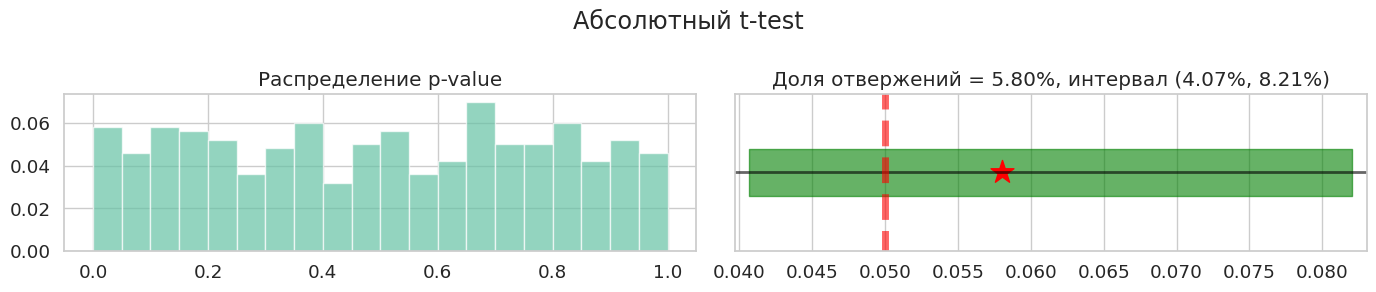

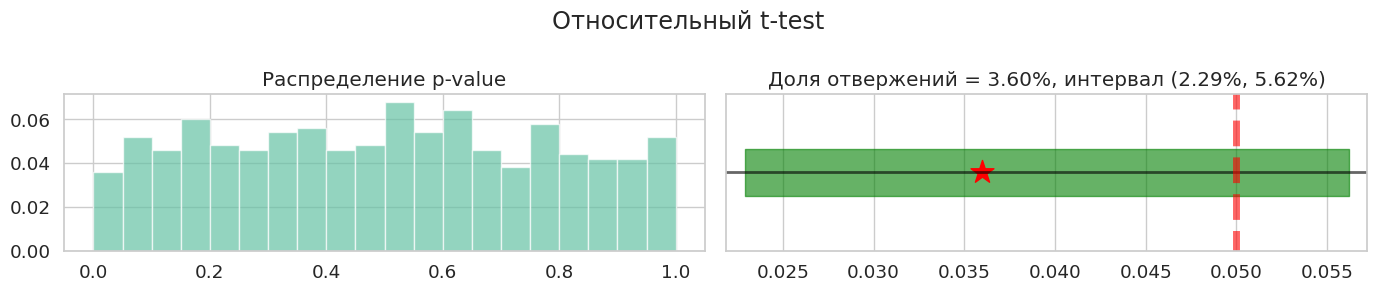

In [248]:
sample_size = 10000
n_iter = 1000
test_list = [
    lambda x, y: absolute_ttest(x, y),
    lambda x, y: relative_ttest(x, y),
]

title_list = [
    'Абсолютный t-test',
    'Относительный t-test',
]

for test, title in zip(test_list, title_list):
    run_experiments(
        test=test,
        add_effect=add_effect,
        effect=0,
        generate_sample=get_february_data,
        sample_size=sample_size,
        n_iter=500,
        draw=True,
        title=title,
    )

Теперь мощности

0it [00:00, ?it/s]

0it [00:00, ?it/s]

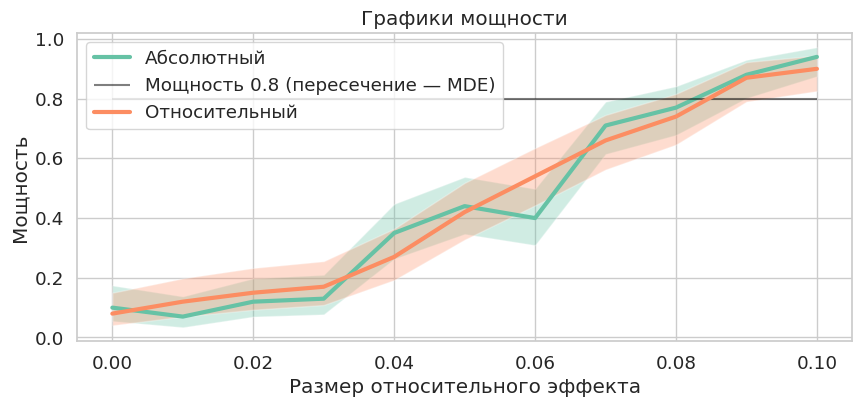

In [256]:
effects_list = np.linspace(0, 0.1, 11)
alpha = 0.05

tests = [
    lambda x, y: absolute_ttest(x, y),
    lambda x, y: relative_ttest(x, y),
]
names = ["Абсолютный", "Относительный"]

for i, (test, name) in enumerate(zip(tests, names)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples=get_february_data,
        sample_size=10000,
        effects_list=effects_list,
        n_iter=100,
        alpha=alpha,
    )
    draw_power(
        powers,
        left_bounds,
        right_bounds,
        effects_list=effects_list,
        label=name,
        new_figure=(i == 0),
    )

Методы оказались корректными, но разницы между мощностями между ними особо нет.

Провалидируйте и сравните следующие подходы к уменьшению дисперсии.
1. Стратификация по операционной системе. Редко встречающиеся операционные системы можно исключить или же объединить с какой-то другой стратой.
2. CUPED со стандартной ковариатой &mdash; значение исследуемой метрики для пользователя/бакета на предэкспериментальном периоде. Однако, в этом случае у нас нет соответствующих значений для новых пользователей. В таком случае можно сделать новый категориальный признак &mdash; имеется ли у пользователя активность во время предэкспериментального периода. Для тех, у кого не было активности, значение ковариаты можно заменить на константу. Далее использовать CUPED со стратификацией по дополнительному категориальному признаку.
3. Комбинация вариантов 1 и 2.
4. Рассмотрите также добавление других ковариат в методе CUPED.
5. CUPED, с прогнозом ML-модели в качестве ковариаты, предсказывающей целевую метрику на основе имеющихся признаков.

Во всех случаях можно использовать любые реализации методов понижения дисперсии, в том числе через линейную регрессию.

Оставим только популярные ОС (гистограмму мы строили), иначе прикрепляем данные к windows

In [319]:
data_cp = data.copy()

Теперь новые функции, сначала создаем датасет со всеми новыми признаками, затем из него будем сэмплировать

In [320]:
def prepare_dataset(data):
    """Создает датасет с новыми признаками, включая активность до февраля."""
    popular_os = ['windows', 'gnu_linux', 'ios_double', 'android', 'macos']
    data['operatingSystemRoot'] = data['operatingSystemRoot'].apply(lambda x: x if x in popular_os else 'windows')
    start_date = "2024-02-01"
    end_date = "2024-02-29"
    
    february_data = data[(data["dateTimeUTC"] >= start_date) & (data["dateTimeUTC"] <= end_date)]
    pre_exp_data = data[data["dateTimeUTC"] < start_date]
    
    numeric_features = ["pageViews"]
    categorical_features = ["regionCountry", "networkType", "browserLanguage",
                            "operatingSystemRoot", "browser", "screenOrientation"]
    binary_features = ["isNewUser"]
    
    agg_funcs = {feature: "mean" for feature in numeric_features}
    agg_funcs.update({feature: lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan for feature in categorical_features})
    agg_funcs.update({feature: "mean" for feature in binary_features})
    
    aggregated_data = february_data.groupby("clientID").agg(agg_funcs).reset_index()
    
    pre_exp_agg = pre_exp_data.groupby("clientID")["pageViews"].mean().rename("pre_exp_pageViews").to_frame()
    pre_exp_agg["was_active"] = 1
    
    aggregated_data = aggregated_data.merge(pre_exp_agg, on="clientID", how="left")
    
    aggregated_data["was_active"] = aggregated_data["was_active"].fillna(0)
    aggregated_data["pre_exp_pageViews"] = aggregated_data["pre_exp_pageViews"].fillna(0)
    
    return aggregated_data

def split_data(data, size):
    """Разбивает данные на две случайные группы одинакового размера."""
    active_clients = data["clientID"].unique()
    size = min(size, len(active_clients))
    
    selected_clients = np.random.choice(active_clients, size=size, replace=False)
    half_size = size // 2
    clients_part1, clients_part2 = selected_clients[:half_size], selected_clients[half_size:]
    
    part1 = data[data["clientID"].isin(clients_part1)]
    part2 = data[data["clientID"].isin(clients_part2)]
    
    return part1, part2


Итого что получаем

In [321]:
improved_data = prepare_dataset(data_cp)
improved_data

,clientID,pageViews,regionCountry,networkType,browserLanguage,operatingSystemRoot,browser,screenOrientation,isNewUser,pre_exp_pageViews,was_active
0,0,3.408451,Russia,NaN,NaN,macos,chrome,0,0.133803,2.395949,1.0
1,16391933141196830,1.000000,Russia,cellular,ru,android,yandexsearch,1,1.000000,1.000000,1.0
2,16584151683302464,1.000000,Russia,NaN,ru,windows,chrome,2,0.500000,1.250000,1.0
3,16899224396248898,1.250000,Russia,NaN,ru,windows,opera,2,0.000000,0.000000,0.0
4,16938278493201088,11.200000,Russia,NaN,ru,windows,opera,2,0.000000,4.872611,1.0
...,...,...,...,...,...,...,...,...,...,...,...
13604,16728156971052448992,4.000000,Russia,cellular,ru,android,samsung_internet,1,1.000000,0.000000,0.0
13605,16746479061044149449,1.000000,Armenia,NaN,en,windows,chrome,2,0.000000,1.000000,1.0
13606,16749337621012426176,2.000000,Russia,cellular,en,android,samsung_internet,1,1.000000,0.000000,0.0
13607,16755278471001387184,10.000000,Russia,cellular,ru,android,chromemobile,1,0.500000,5.272727,1.0


Функции для CUPED

In [322]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

def regression_ttest(x_data, y_data, sample_name='pilot', 
                     treatment_name='treatment', covariate_names=[],
                     stratify_by=None, ml_model=None):
    '''
    T-test с CUPED/без CUPED, реализованный через линейную регрессию c возможностью стратификации.
    
    Аргументы:
    x_data, y_data -- выборки одинакового размера (DataFrame)
    :param sample_name: имя столбца с целевой переменной
    :param covariate_names: массив имен столбцов-ковариат
    :param stratify_by: категориальный признак для стратификации
    :param ml_model: МЛ-модель предсказывающая таргет по признакам для дальнейшего использования
    предсказания в качестве ковариата для CUPED

    Возвращает:
    stat -- статистика критерия
    pvalue -- p-value критерия
    left_bound, right_bound -- границы дов. интервала
    '''
    
    x_data = x_data.copy()
    y_data = y_data.copy()
    
    x_data[treatment_name] = 1
    y_data[treatment_name] = 0

    data = pd.concat([x_data, y_data], ignore_index=True)

    if stratify_by:
        dummies = pd.get_dummies(data, columns=stratify_by)

    if ml_model is not None:
        feature_cols = [col for col in data.columns if col not in [sample_name, treatment_name]]
        categorical_cols = data[feature_cols].select_dtypes(include=['object']).columns.tolist()
    
        train_data = data.dropna(subset=[sample_name, treatment_name])

        for col in categorical_cols:
            train_data[col] = train_data[col].astype(str).fillna('unknown')

        
        X_train, X_test, y_train, y_test = train_test_split(train_data[feature_cols],
                                                            train_data[sample_name],
                                                            test_size=0.2,
                                                            random_state=42)
        
        ml_model.fit(X_train, y_train, cat_features=categorical_cols)
        data['ml_pred'] = ml_model.predict(data[feature_cols].fillna(0))
        covariate_names.append('ml_pred')

    feature_names = [treatment_name] + list(covariate_names)

    model = ols(f'{sample_name} ~ ' + ' + '.join(feature_names), data=data).fit(cov_type='HC3')

    summary = model.summary2().tables[1]

    stat = summary.loc[treatment_name, 'z']
    pvalue = summary.loc[treatment_name, 'P>|z|']
    left_bound = summary.loc[treatment_name, '[0.025']
    right_bound = summary.loc[treatment_name, '0.975]']

    return stat, pvalue, left_bound, right_bound

Итого

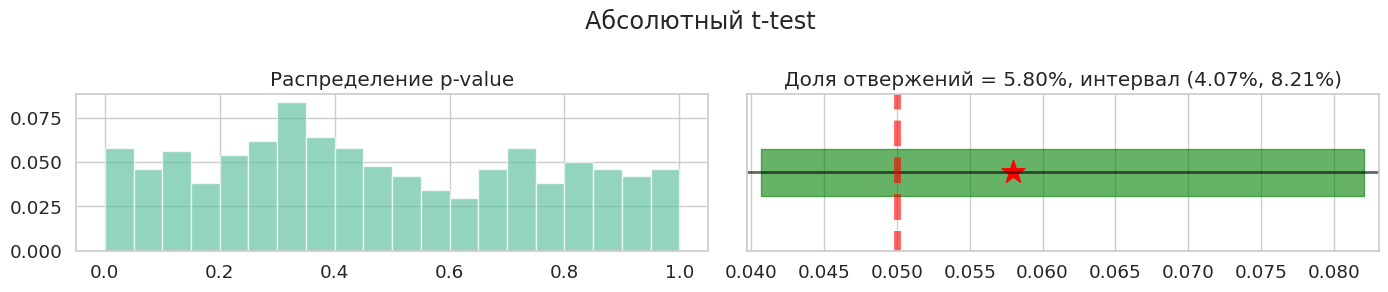

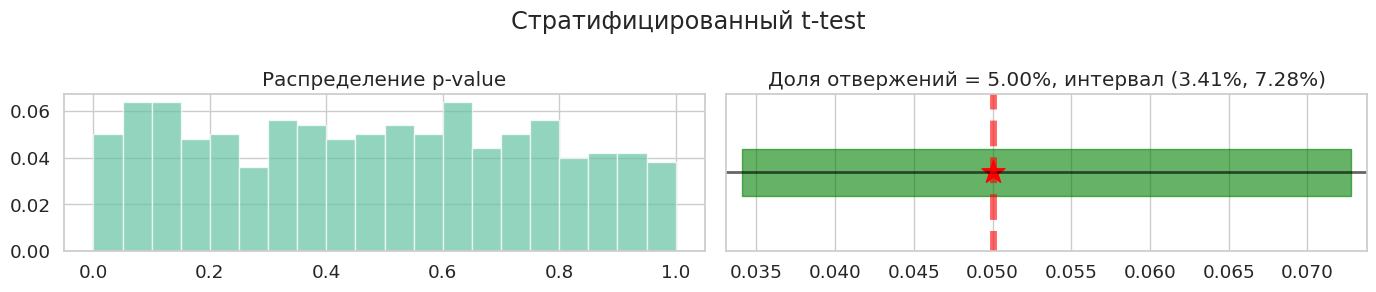

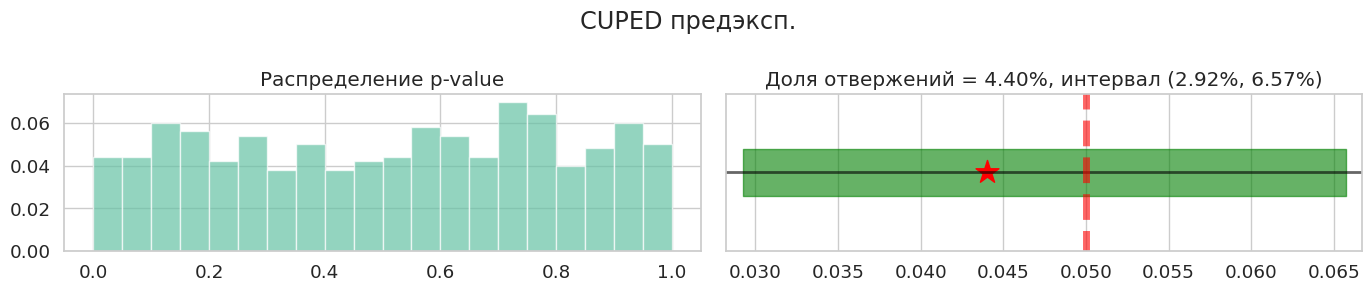

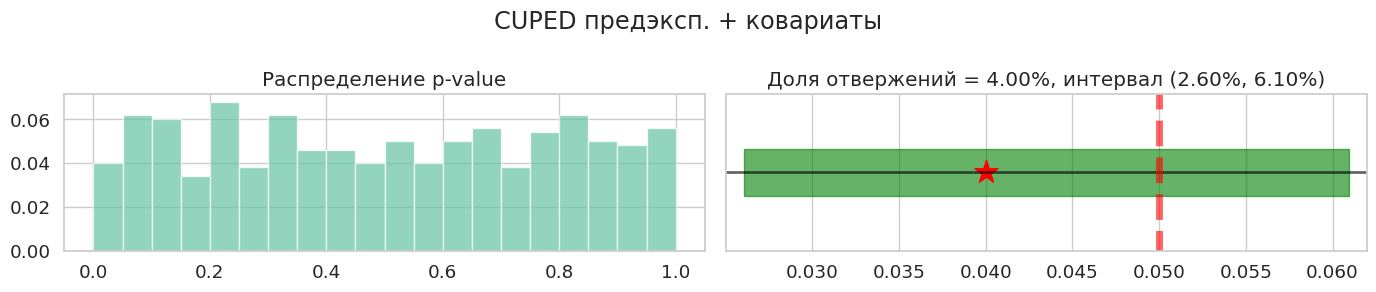

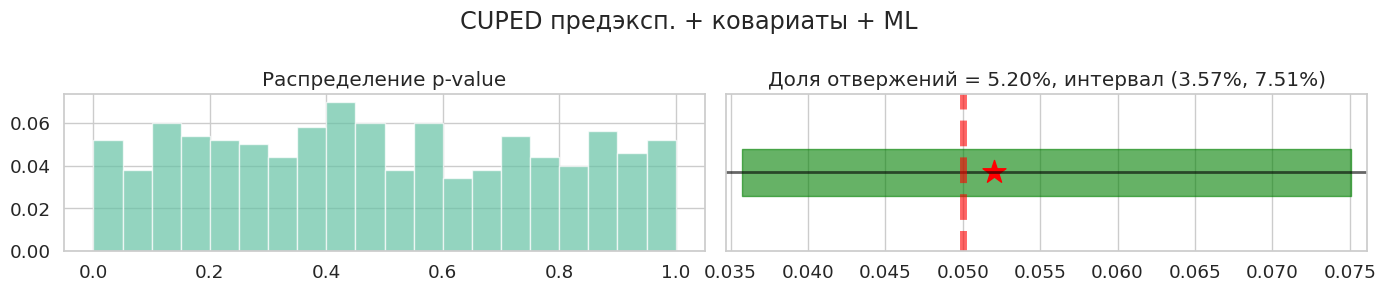

In [323]:
sample_size = 10000
n_iter = 1000
strata_weights=calculate_strata_weights(improved_data,
                                       'operatingSystemRoot',
                                       'pageViews')
model = CatBoostRegressor(iterations=50, verbose=0)

test_list = [
    lambda x, y: absolute_ttest(x['pageViews'], y['pageViews']),
    lambda x, y: stratified_ttest(x, y,
                                  strata_name='operatingSystemRoot',
                                  target_name='pageViews',
                                  strata_weights=strata_weights,
                                  method='stratified'),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='pageViews',
                                 covariate_names=['pre_exp_pageViews'],
                                 stratify_by=['was_active']),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='pageViews',
                                 covariate_names=['pre_exp_pageViews'],
                                 stratify_by=['was_active',
                                              'operatingSystemRoot',
                                              'browser']),
    lambda x, y: regression_ttest(x, y,
                                 sample_name='pageViews',
                                 covariate_names=['pre_exp_pageViews'],
                                 stratify_by=['was_active',
                                              'operatingSystemRoot',
                                              'browser'],
                                 ml_model=model)

]

title_list = [
    'Абсолютный t-test',
    'Стратифицированный t-test',
    'CUPED предэксп.',
    'CUPED предэксп. + ковариаты',
    'CUPED предэксп. + ковариаты + ML'
]

for test, title in zip(test_list, title_list):
    run_experiments(
        test=test,
        target_column='pageViews',
        generate_sample=lambda size: split_data(improved_data, size),
        sample_size=10000,
        n_iter=500,
        draw=True,
        title=title,
    )

Мощности

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

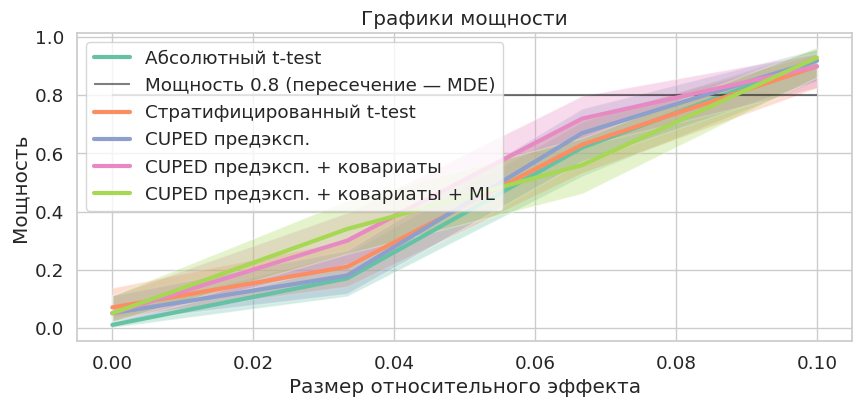

In [327]:
effects_list = np.linspace(0, 0.1, 4)
alpha = 0.05
for i, (test, name) in enumerate(zip(test_list, title_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples=lambda size: split_data(improved_data, size),
        sample_size=10000,
        effects_list=effects_list,
        n_iter=100,
        alpha=alpha,
    )
    draw_power(
        powers,
        left_bounds,
        right_bounds,
        effects_list=effects_list,
        label=name,
        new_figure=(i == 0),
    )

Использование CUPED увеличивает мощность, а стратификация почти ее не изменяет. Хорошей моделью оказалось CUPED с предэкспериментальными данными и ковариатами - ковариаты помогли.

ML сильного выиграша не дает, но сильно увеличивает время рассчета.

Однако существенно улучшения не получилось.

## Стратификация

---
### Задача 3.

Пусть в общей совокупности данных имеется $K$ страт, причем вес страты $k \in \{1, ..., K\}$ равен $w_k$, где $w_1+...+w_K=1$. Пусть также выборка размера $n$ выбрана случайно, то есть вероятность выбрать элемент из страты $k$ равна $w_k$.

Посчитайте $\mathsf{E} \frac{1}{n_k}$ с точностью до $o(1/n^2)$, где $n_k$ &mdash; количество элементов выборки из страты $k$.

*Указание.* Разложите по Тейлору функцию $f(x)=1/x$ в точке $x_0\not=0$.

Ясно, что

$$n_k \sim \text{Binom}(n, w_k)$$

Имеем

$$\mathsf E n_k = n w_k \qquad \qquad \qquad \mathsf D n_k^2 = n w_k (1 - w_k)$$

Раскладывая с остаточным членом в форме Лагранжа получаем $\xi \in (x, x_0)$:

$$f(x) = \frac{1}{x_0} - \frac{1}{x_0^2}(x-x_0) + \frac{1}{x_0^3}(x-x_0)^2 - \frac{1}{\xi^4}(x-x_0)^3$$



Беря матожидания от обеих частей при $x_0 = n w_k$:
$$\mathsf E \frac{1}{n_k} = \frac{1}{n w_k} - \frac{1}{(n w_k)^2} (\mathsf E n_k - n w_k) + \frac{1}{(n w_k)^3} \mathsf E(\mathsf E n_k - n w_k)^2 - \frac{1}{\xi^4}\mathsf E(\mathsf E n_k - n w_k)^3$$

Заметим, что мы имеем в слагаемых моменты биномиального распределения. 

Остаток $$r = \frac{1}{\xi^4}\mathsf E(\mathsf E n_k - n w_k)^3$$ будет $o(1/n^2)$, так как третий момент биномиального распределения есть $O(n)$ (просто честно считаем через производящую фунцию и ее третью производную - совершенно очевидные выкладки), а $\xi$ эквивалетна $nw_k \sim n$, откуда $r = O(\frac{n}{n^4}) = o(\frac{1}{n^2})$

Имеем:

$$\mathsf E \frac{1}{n_k} = \frac{1}{n w_k} + \frac{1}{(n w_k)^3} nw_k(1-w_k) + o\left(\frac{1}{n^2}\right)$$
$$\mathsf E \frac{1}{n_k} = \frac{n w_k + 1 - w_k}{(n w_k)^2}  + o\left(\frac{1}{n^2}\right)$$
$$\mathsf E \frac{1}{n_k} = \frac{w_k(n-1) + 1}{(n w_k)^2}  + o\left(\frac{1}{n^2}\right)$$

---
### Задача 4.

Пусть $Y_1, ..., Y_n$ &mdash; выборка целевого признака, а $X_1, ..., X_n$ &mdash; соответствующая выборка ковариат. Пусть также все объекты делятся на $K$ страт. Получите формулу значения $\theta$ в методе CUPED при использовании стратифицированного среднего в случае
* стратифицированного семплирования,
* случайного семплирования.

Будем считать, что "при использовании стратифицированного среднего" означает, что мы применяем CUPED следующим образом (к стратифицированному среднему) ($\overline U_k$ означает усреднение по $k$-й страте):

$$z = \sum_{k=1}^K \left[w_k \overline Y_k - \theta (w_k \overline X_k - w_k \mathsf E X_k)\right]$$

То есть величина $z$ будет использоваться в t-test'е и вычисляться по эксперементальной и контрольной выборкам. Мы хотим минимизировать ее дисперсию:

$$\mathsf D z = \mathsf D \left(\sum_k\left[w_k \overline Y_k - \theta w_k \overline X_k\right]\right)$$

Разбивая на сумму дисперсий по независимым подвыборкам (в $k$-й страте $I_k$ элементов, $X_k, Y_k$ - с.в. из $k$-й страты):

$$\mathsf D z = \sum_k w_k^2\mathsf D(\overline Y_k - \theta \overline X_k) = \sum_k\frac{w_k^2}{I_k} \mathsf D(Y_k - \theta X_k) = \sum_k\frac{w_k^2}{I_k} \left[ \mathsf D Y_k + \theta^2 \mathsf D X_k - 2 \theta \text{cov}(Y_k, X_k)\right] $$
Минимизируя получаемую квадратичную функцию, имеем:

$$\frac{\partial \mathsf Dz}{\partial \theta} = 0 = \sum_k \frac{w_k^2 \mathsf D X_k}{I_k} 2\theta - 2\sum_k\frac{w_k^2 \text{cov}(Y_k, X_k)}{I_k}$$

$$\theta = \frac{\sum_k\frac{w_k^2}{I_k} \text{cov}(Y_k, X_k)}{\sum_k \frac{w_k^2}{I_k}\mathsf D X_k}$$
Для случайного сэмплирования формула так и останется выглядеть (мы ничего дополнительно про $I_k$ сказать не можем), а для стратифицированного имеем (при размере выборки $n$: $I_k = w_k n$):

$$\theta = \frac{\sum_k w_k \text{cov}(Y_k, X_k)}{\sum_k w_k\mathsf D X_k}$$

---
### Задача 5.

Рассмотренные нами методы стратификации работают в случае стратифицированного семплирования, либо же случайного семплирования. Во втором случае метод называется постстратификацией. Однако, как мы видели на занятии, при наличии сильных перекосов в соотношении между стратами вероятность ошибки 1 рода может сильно увеличиваться.

Промоделируйте распределение разности 
* обычного среднего
* стратифицированного среднего

при наличии сильных перекосов в соотношении между стратами и проинтерпретируйте результаты.

Код для семплирования перекошенных данных и для семплирования разности средних есть в ноутбуке с занятия.

  0%|          | 0/10000 [00:00<?, ?it/s]

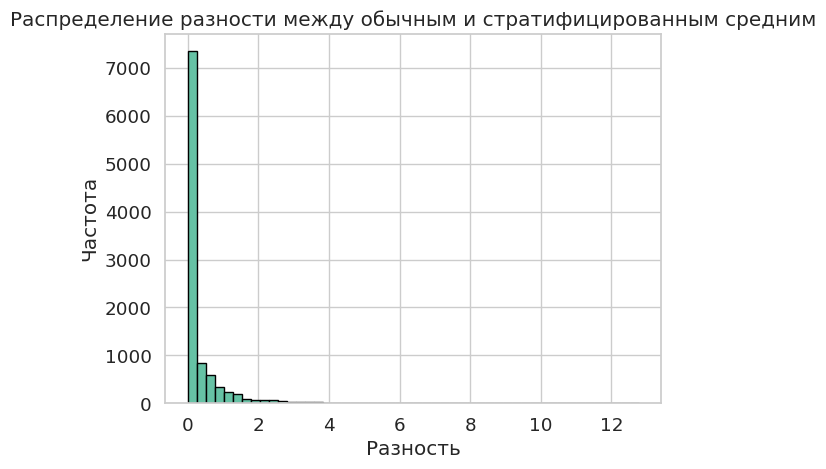

In [126]:
sample_sizes = [100000, 500]
scale = [1, 100]
population = generate_mix_expon(sample_sizes, scale)
population_size = sample_sizes[0] + sample_sizes[1] 

n_experiments = 10000
differences = []

for _ in tqdm(range(n_experiments)):
    sample_size = 100
    sample_indices = np.random.choice(len(population),
                                      size=sample_size,
                                      replace=False)
    sample = population[sample_indices]

    stratum1_indices = sample_indices[sample_indices < sample_sizes[0]]
    stratum2_indices = sample_indices[sample_indices >= sample_sizes[0]]

    stratum1_values = population[stratum1_indices]
    stratum2_values = population[stratum2_indices]

    #count_in_stratum1 = np.sum((sample_indices <= sample_sizes[0]))
    #count_in_stratum2 = sample_size - count_in_stratum1
    
    simple_mean = np.mean(sample)
    
    mean_stratum1 = np.mean(stratum1_values) if len(stratum1_values) > 0 else 0
    mean_stratum2 = np.mean(stratum2_values) if len(stratum2_values) > 0 else 0

    # Вычисление стратифицированного среднего
    stratified_mean = (
        sample_sizes[0] * mean_stratum1
        + sample_sizes[1] * mean_stratum2
    ) / (sample_sizes[0] + sample_sizes[1])
    
    differences.append(simple_mean - stratified_mean)

plt.hist(differences, bins=50, edgecolor='black')
plt.title('Распределение разности между обычным и стратифицированным средним')
plt.xlabel('Разность')
plt.ylabel('Частота')
plt.show()

У этой гистограммы есть хвост, обычное среднее имеет выбросы: когда в выборку попадает элемент из второй страты он сильно перекашивает статистику. При этом стратифицированное среднее более устойчиво

В чем же тогда проблема того, что стратифицированный t-test увеличивает вероятность ошибки 1 рода?

Стратификация меняет распределение статистики, по которой считается t-test. Это может быть, например, систематическая ошибка в оценке самих стратификаций (вероятностей страт)

Можно ли как-то исправить его с помощью некоторой универсальной статистической процедуры?

Да. Можно, например, бустрепить нужную статитику и найти ее распределение

Реализуйте эту процедруру.

Для начала, вспомогательные функции

In [128]:
sample_sizes = [100000, 5000]
scale = [1, 100]

def count_mean(sample_indices, effect_func=None):
    ''' Подсчет среднего. '''
    if effect_func is not None:
        return np.mean(effect_func(data[sample_indices]))
    return np.mean(data[sample_indices])
    
def count_strat_mean(sample_indices, effect_func=None):
    ''' Подсчет стратифицированного среднего. '''
    stratum1_indices = sample_indices[sample_indices < sample_sizes[0]]
    stratum2_indices = sample_indices[sample_indices >= sample_sizes[0]]

    
    stratum1_values = data[stratum1_indices]
    stratum2_values = data[stratum2_indices]
    
    if effect_func is not None:
        all_values = np.concatenate([stratum1_values, stratum2_values])
        all_values = effect_func(all_values)
        stratum1_values, stratum2_values = all_values[:len(stratum1_values)], all_values[len(stratum1_values):]

    mean_stratum1 = np.mean(stratum1_values) if len(stratum1_values) > 0 else 0
    mean_stratum2 = np.mean(stratum2_values) if len(stratum2_values) > 0 else 0

    stratified_mean = (
        sample_sizes[0] * mean_stratum1
        + sample_sizes[1] * mean_stratum2
    ) / (sample_sizes[0] + sample_sizes[1])
    
    return stratified_mean

def compute_bootstrap_stats(data, B=5000, sample_size=100,
                            stat_func=count_strat_mean):
    '''
    Рассчет бутстрепных статистик.
    
    Аргументы:
    data -- данные
    B -- количество бутстрепных выборок
    sample_size -- размер бустрепной выборки
    stat_func -- функция для расчета статистики критерия
    
    Возвращает:
    boot_stats -- массив рассчитанных статистик
    '''
    boot_samples_indices = [np.random.choice(len(data), size=sample_size * 2,
                                     replace=True) for _ in range(B)]
    boot_stats = []
    for sample_indices in boot_samples_indices:
        boot_sample1_indices = sample_indices[:sample_size]
        boot_sample2_indices = sample_indices[sample_size:]
        boot_stat = stat_func(boot_sample1_indices) - stat_func(boot_sample2_indices)
        boot_stats.append(boot_stat)
    
    return np.array(boot_stats)

def compute_p_value(boot_stats, stat_original, alternative="two-sided"):
    '''
    Рассчет p-value на основе бутстрепных статистик для разных альтернатив.
    
    Аргументы:
    boot_stats -- массив бутстрепных статистик
    stat_original -- исходная статистика критерия
    alternative -- альтернатива: "two-sided", "greater", "less"
    
    Возвращает:
    p-value
    '''
    if alternative == "two-sided":
        return 2 * min(
            np.mean(boot_stats >= stat_original),
            np.mean(boot_stats <= stat_original)
        )
    elif alternative == "greater":
        return np.mean(boot_stats >= stat_original)
    elif alternative == "less":
        return np.mean(boot_stats <= stat_original)
    else:
        raise ValueError("Недопустимое значение alternative. Используйте 'two-sided', 'greater' или 'less'.")

def bootstrap_t_test(boot_stats, x, y,
                     stat_func=count_strat_mean,
                     alternative='two-sided'):
    '''
    Оценка статистики критерия, доверительного интервала и p-value на основе бутстрепных выборок.
    
    Аргументы:
    boot_stats -- статистики бутстрепных выборок
    x -- тестовая выборка
    y -- контрольная выборка
    stat_func -- функция для расчета статистики критерия
    alternative -- вид альтернативы (по умолчанию двусторонняя). Возможные знаечения:
     'two-sided', 'greater' или 'less'
    
    Возвращает:
    Словарь с оригинальной статистикой, доверительным интервалом и p-value
    '''
    
    if alternative == "two-sided":
        ci_lower, ci_upper = np.percentile(boot_stats, [2.5, 97.5])
    elif alternative == "greater":
        ci_lower, ci_upper = np.percentile(boot_stats, [5, 100])
    elif alternative == "less":
        ci_lower, ci_upper = np.percentile(boot_stats, [0, 95])
    else:
        raise ValueError("Недопустимое значение alternative. Используйте 'two-sided', 'greater' или 'less'.")
    
    stat_original = stat_func(x) - stat_func(y)
    
    p_value = compute_p_value(boot_stats, stat_original)
    
    return [stat_original, p_value]



Имеем

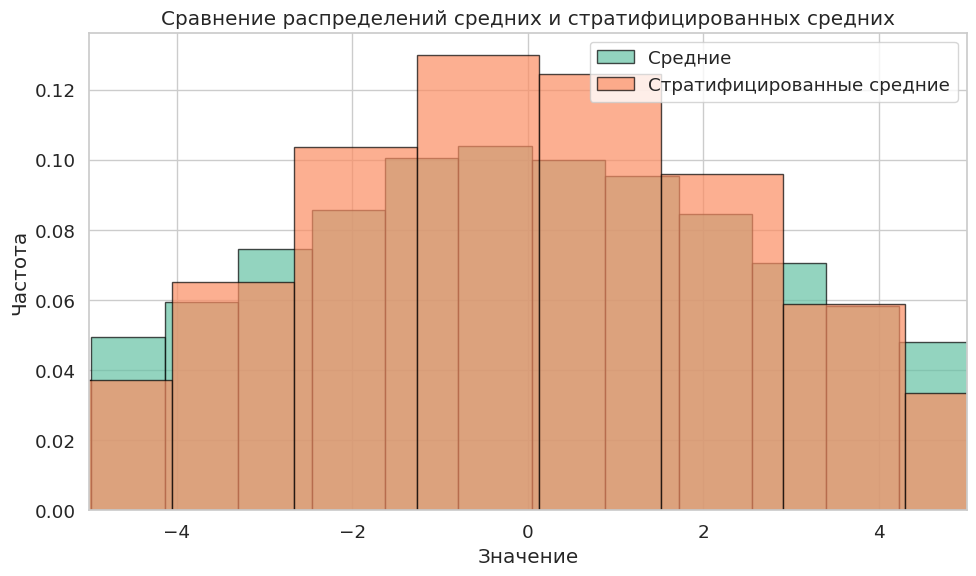

In [129]:
data = generate_mix_expon(sample_sizes, scale)

boot_stats_strat = compute_bootstrap_stats(data, B=50000,
                                         sample_size=100,
                                         stat_func=count_strat_mean)
boot_stats_mean = compute_bootstrap_stats(data, B=50000,
                                         sample_size=100,
                                         stat_func=count_mean)

Провалидируйте полученный тест, а также сравните его по мощности со стандартным t-test. Используйте код с занятий.

Генерация выборки

In [130]:
def sample_generation(size=100):
    x = data[np.random.choice(len(data), size=sample_size,
                                     replace=False)]
    y = data[np.random.choice(len(data), size=sample_size,
                                     replace=False)]
    return x, y

def indices_generation(size=100):
    x = np.random.choice(len(data), size=sample_size,
                                     replace=False)
    y = np.random.choice(len(data), size=sample_size,
                                     replace=False)
    return x, y


Валидация

  0%|          | 0/1000 [00:00<?, ?it/s]

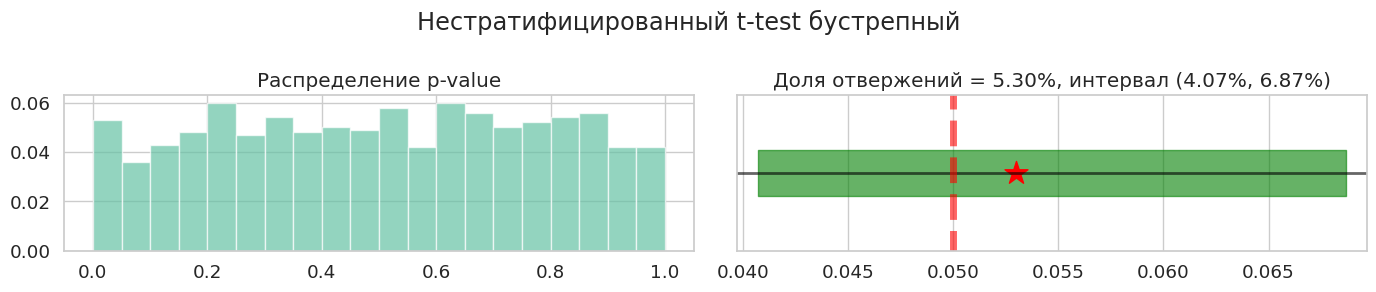

  0%|          | 0/1000 [00:00<?, ?it/s]

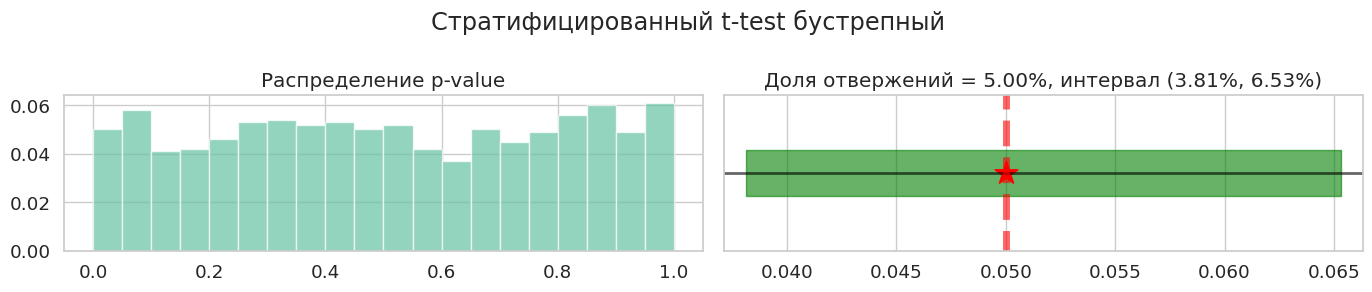

  0%|          | 0/1000 [00:00<?, ?it/s]

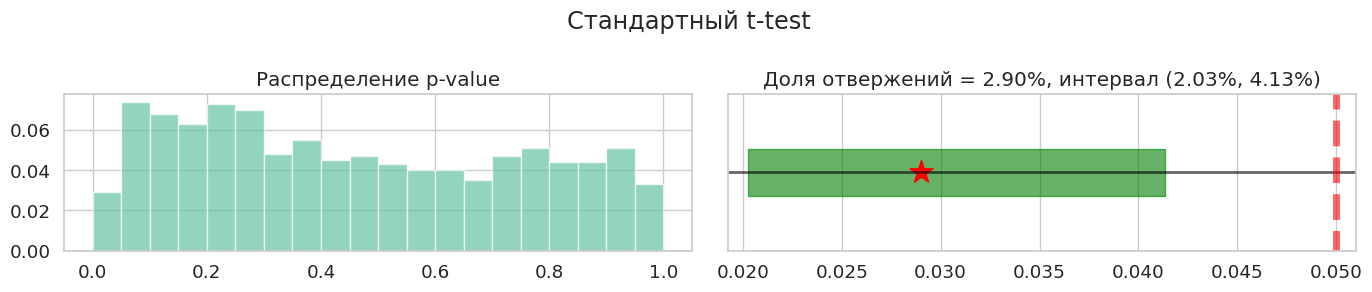

In [131]:
test_list = [
    lambda x, y: bootstrap_t_test(boot_stats_mean, x, y,
                                  stat_func=count_mean
                                 ),
    lambda x, y: bootstrap_t_test(boot_stats_strat, x, y,
                                  stat_func=count_strat_mean
                                 ),
    lambda x, y: sps.ttest_ind(x, y, equal_var=False),
]

title_list = [
    'Нестратифицированный t-test бустрепный',
    'Стратифицированный t-test бустрепный',
    'Стандартный t-test',
]

generate_list = [
    indices_generation,
    indices_generation,
    sample_generation
]


for test, title, generation_func in zip(test_list, title_list, generate_list):
    run_experiments(
        test=test,
        generate_samples=generation_func,
        sample_size=100,
        n_iter=1000,
        draw=True,
        title=title,
    )

И мощности

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

0it [00:00, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

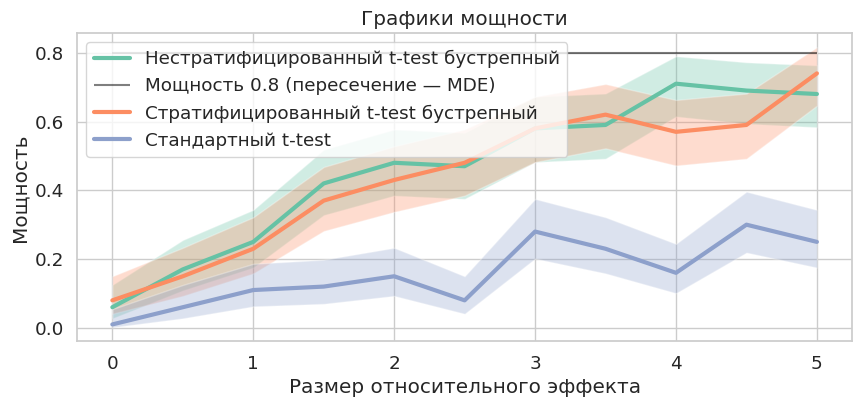

In [132]:
test_list = [
    lambda x, y, func: bootstrap_t_test(boot_stats_mean, x, y,
                                  stat_func=lambda sample: count_mean(sample, func)
                                 ),
    lambda x, y, func: bootstrap_t_test(boot_stats_strat, x, y,
                                        stat_func=lambda sample: count_strat_mean(sample, func)
                                 ),
    lambda x, y: sps.ttest_ind(x, y, equal_var=False),
]

for i, (test, title, gen_func) in enumerate(zip(test_list, title_list, generate_list)):
    powers, left_bounds, right_bounds = estimate_power(
        test=test,
        generate_samples=gen_func,
        sample_size=100,
        n_iter=100,
        effects_list=np.linspace(0, 5, 11),
        add_effect_as_func=i!=2
    )
    
    draw_power(powers, left_bounds, right_bounds,
               label=title, new_figure=(i==0), effects_list=np.linspace(0, 5, 11))

Отсюда видно, что бустреп позволяет выиграть в мощности. Однако, может оказаться так, что он будет проигрывать, если вторая страта маленькая (тогда выигрывает стандартный t-test). При этом бустреп позволяет невелировать выбросы обычного среднего. Все бустрепы корректны, t-test оказался тоже.